In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

In [76]:
df = pd.read_csv('Data/price/ETH-USD.csv')

In [77]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,09/11/2017,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,10/11/2017,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,11/11/2017,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,12/11/2017,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,13/11/2017,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [78]:
df['Date'] = pd.to_datetime(df['Date'])

In [79]:
df['Week Day'] = df['Date'].dt.weekday.apply(lambda x: 1 if x < 5 else 0)
df['Day'] = df['Date'].dt.weekday.apply(lambda x: x)

In [80]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Week Day,Day
2003,2023-05-05,1877.833130,1998.413574,1876.946655,1995.060913,1995.060913,9498261360,1,4
2004,2023-06-05,1995.479126,2017.559448,1870.605591,1900.221802,1900.221802,9623243037,1,0
2005,2023-07-05,1899.917603,1933.998413,1873.076416,1873.076416,1873.076416,6883942236,1,2
2006,2023-08-05,1872.475098,1886.162109,1818.450562,1849.042725,1849.042725,9895102899,0,5
2007,2023-09-05,1848.572388,1855.824951,1833.420288,1845.526611,1845.526611,7899809280,1,1


In [81]:
df['Next_High'] = df['High'].shift(-1)
df['Next_Low'] = df['Low'].shift(-1)
df.set_index('Date', inplace=True)
df.drop('Adj Close', axis=1, inplace=True)
df.tail()

,Open,High,Low,Close,Volume,Week Day,Day,Next_High,Next_Low
Date,,,,,,,,,
2023-05-05,1877.833130,1998.413574,1876.946655,1995.060913,9498261360,1,4,2017.559448,1870.605591
2023-06-05,1995.479126,2017.559448,1870.605591,1900.221802,9623243037,1,0,1933.998413,1873.076416
2023-07-05,1899.917603,1933.998413,1873.076416,1873.076416,6883942236,1,2,1886.162109,1818.450562
2023-08-05,1872.475098,1886.162109,1818.450562,1849.042725,9895102899,0,5,1855.824951,1833.420288
2023-09-05,1848.572388,1855.824951,1833.420288,1845.526611,7899809280,1,1,NaN,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2008 entries, 2017-09-11 to 2023-09-05
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2008 non-null   float64
 1   High       2008 non-null   float64
 2   Low        2008 non-null   float64
 3   Close      2008 non-null   float64
 4   Volume     2008 non-null   int64  
 5   Week Day   2008 non-null   int64  
 6   Day        2008 non-null   int64  
 7   Next_High  2007 non-null   float64
 8   Next_Low   2007 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 156.9 KB


In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2008.0,1.165016e+03,1.158752e+03,8.427969e+01,2.186955e+02,6.081049e+02,1.793533e+03,4.810071e+03
High,2008.0,1.201298e+03,1.193638e+03,8.534274e+01,2.242475e+02,6.221703e+02,1.837046e+03,4.891705e+03
Low,2008.0,1.124441e+03,1.118676e+03,8.282989e+01,2.122779e+02,5.836295e+02,1.732803e+03,4.718039e+03
Close,2008.0,1.165559e+03,1.158242e+03,8.430830e+01,2.186169e+02,6.088785e+02,1.793144e+03,4.812087e+03
Volume,2008.0,1.262044e+10,1.051423e+10,6.217330e+08,4.897369e+09,1.015476e+10,1.756317e+10,8.448291e+10
Week Day,2008.0,7.141434e-01,4.519340e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Day,2008.0,2.998506e+00,2.001618e+00,0.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
Next_High,2007.0,1.201732e+03,1.193777e+03,8.534274e+01,2.242407e+02,6.224527e+02,1.837093e+03,4.891705e+03
Next_Low,2007.0,1.124848e+03,1.118806e+03,8.282989e+01,2.122516e+02,5.837470e+02,1.733082e+03,4.718039e+03


In [84]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Week Day     0
Day          0
Next_High    1
Next_Low     1
dtype: int64

In [85]:
#sns.pairplot(df)

In [86]:
df.corr()

,Open,High,Low,Close,Volume,Week Day,Day,Next_High,Next_Low
Open,1.000000,0.999186,0.998235,0.997741,0.522631,-0.005089,0.007657,0.997374,0.995819
High,0.999186,1.000000,0.998044,0.998854,0.532740,-0.002346,0.005297,0.998576,0.996546
Low,0.998235,0.998044,1.000000,0.998888,0.503516,-0.007253,0.009035,0.997792,0.997504
Close,0.997741,0.998854,0.998888,1.000000,0.519805,-0.004921,0.007074,0.999175,0.998264
Volume,0.522631,0.532740,0.503516,0.519805,1.000000,0.064120,-0.046500,0.528781,0.509124
Week Day,-0.005089,-0.002346,-0.007253,-0.004921,0.064120,1.000000,-0.790875,-0.004175,-0.006204
Day,0.007657,0.005297,0.009035,0.007074,-0.046500,-0.790875,1.000000,0.005209,0.007824
Next_High,0.997374,0.998576,0.997792,0.999175,0.528781,-0.004175,0.005209,1.000000,0.998044
Next_Low,0.995819,0.996546,0.997504,0.998264,0.509124,-0.006204,0.007824,0.998044,1.000000


<AxesSubplot:xlabel='Date', ylabel='Next_High'>

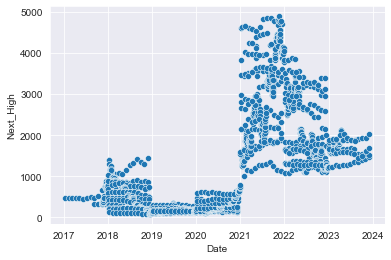

In [87]:
sns.scatterplot(data=df, x='Date', y='Next_High')

In [88]:
df.to_csv('Data/price/clean_price_data')